In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/processed/final_dataset.csv", parse_dates=["timestamp"])
df.head()


,timestamp,load_actual,temperature,humidity,dew_point,solar_generation,wind_generation
0,2014-12-31 23:00:00,22734.0,7.5,81.0,4.5,50.0,5461.0
1,2015-01-01 00:00:00,22734.0,7.3,81.0,4.2,50.0,5461.0
2,2015-01-01 01:00:00,22734.0,7.0,81.0,3.9,50.0,5461.0
3,2015-01-01 02:00:00,21286.0,6.8,81.0,3.7,50.0,5238.0
4,2015-01-01 03:00:00,20264.0,6.9,79.0,3.5,42.0,4935.0


In [3]:
target = "load_actual"

drop_cols = ["timestamp", "load_actual"]

X = df.drop(columns=drop_cols)
y = df[target]


In [4]:
train_size = int(len(df) * 0.8)

X_train = X.iloc[:train_size]
X_test  = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]


In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Function to calculate MAPE (scikit learn doesn't provide it defaultly)

In [14]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Baseline Model 1 — Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)


In [15]:
mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = mean_squared_error(y_test, pred_lr) ** 0.5
mape_lr = mean_absolute_percentage_error(y_test, pred_lr)

print("Linear Regression:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("MAPE:", mape_lr)


Linear Regression:
MAE: 3378.3308056874434
RMSE: 4084.6073768855817
MAPE: 12.04856467823253


Baseline Model 2 — Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)


In [16]:
mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = mean_squared_error(y_test, pred_rf) ** 0.5
mape_rf = mean_absolute_percentage_error(y_test, pred_rf)

print("Random Forest:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("MAPE:", mape_rf)



Random Forest:
MAE: 1853.148402475432
RMSE: 2389.9345678661393
MAPE: 6.573496344102435


Baseline Model 3 — XGBoost

In [10]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)


In [17]:
mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = mean_squared_error(y_test, pred_xgb) ** 0.5
mape_xgb = mean_absolute_percentage_error(y_test, pred_xgb)

print("XGBoost:")
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("MAPE:", mape_xgb)



XGBoost:
MAE: 2700.707090633343
RMSE: 3393.388149939173
MAPE: 9.581704883603084


Comparing All Baseline Models

In [18]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [mae_lr, mae_rf, mae_xgb],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb],
    "MAPE (%)": [mape_lr, mape_rf, mape_xgb]
})

results



,Model,MAE,RMSE,MAPE (%)
0,Linear Regression,3378.330806,4084.607377,12.048565
1,Random Forest,1853.148402,2389.934568,6.573496
2,XGBoost,2700.707091,3393.388150,9.581705


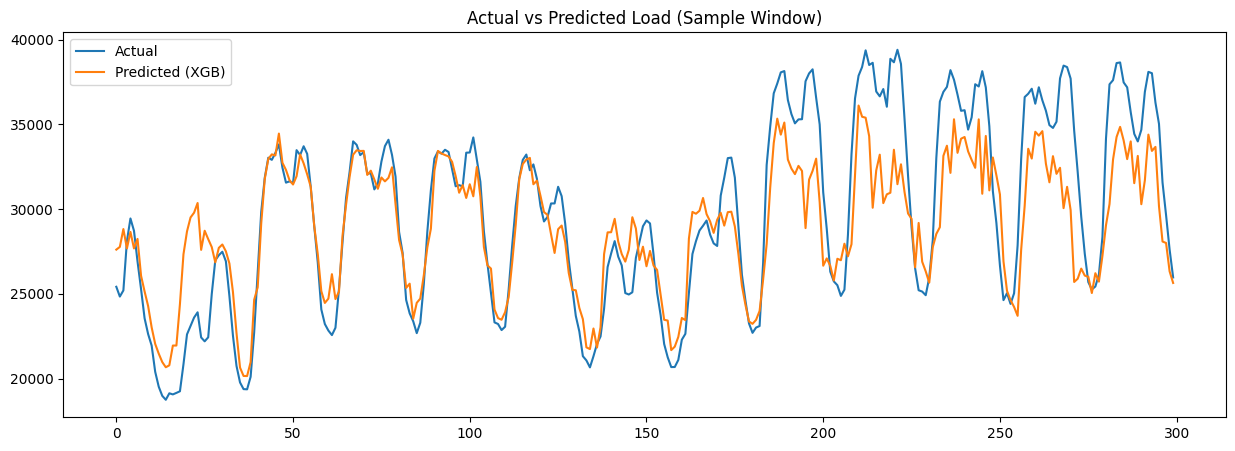

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values[:300], label="Actual")
plt.plot(pred_xgb[:300], label="Predicted (XGB)")
plt.legend()
plt.title("Actual vs Predicted Load (Sample Window)")
plt.show()
